# Regression 실습 - Bike Sharing Demand

## 데이터 탐색 및 전처리

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bike_df = pd.read_csv('datasets\\bike_train.csv')
bike_df.shape

(10886, 12)

In [3]:
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


datetime: hourly date + timestamp  
season: 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울  
holiday: 1 = 토, 일요일의 주말을 제외한 국경일 등의 휴일, 0 = 휴일이 아닌 날  
workingday: 1 = 토, 일요일의 주말 및 휴일이 아닌 주중, 0 = 주말 및 휴일  
weather:  
• 1 = 맑음, 약간 구름 낀 흐림  
• 2 = 안개, 안개 + 흐림  
• 3 = 가벼운 눈, 가벼운 비 + 천둥  
• 4 = 심한 눈/비, 천둥/번개  
temp: 온도(섭씨)   
atemp: 체감온도(섭씨)  
humidity: 상대습도  
windspeed: 풍속  
casual: 사전에 등록되지 않는 사용자가 대여한 횟수  
registered: 사전에 등록된 사용자가 대여한 횟수  
count: 대여 횟수  

In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


* 문자열을 datetime 타입으로 변경

In [5]:
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


* datetime 타입에서 년, 월, 일, 시간 추출

In [7]:
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)

In [8]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [9]:
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


* 열삭제 (datetime, casual, registered)

In [10]:
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1,inplace=True)

* X와 y로 특성값과 타깃값 분리

In [11]:
y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis=1,inplace=False)

* 훈련세트와 테스트 세트 분리

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

* 선형 모델 훈련과 예측

In [14]:
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [16]:
# log 값 변환 시 언더플로우 영향으로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

* RMSLE

In [17]:
rmsle(y_test,pred)

C:\Users\edu\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log1p
  after removing the cwd from sys.path.


1.1646636237113719

* RMSE

In [18]:
np.sqrt(mean_squared_error(y_test,pred))

140.89958867165618

* MAE

In [19]:
mean_absolute_error(y_test,pred)

105.92444835100294

* 예측과 실제 값 확인해 보기(top 5)

In [20]:
result_df = pd.DataFrame()
result_df['real_count']=y_test.values
result_df['predicted_count']= np.round(pred)
result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
result_df.sort_values(by='diff', ascending=False)[:5]

,real_count,predicted_count,diff
1618,890,322.0,568.0
3151,798,241.0,557.0
966,884,327.0,557.0
412,745,194.0,551.0
2817,856,310.0,546.0


* 전체 y 타깃값의 분포 확인 (histogram)

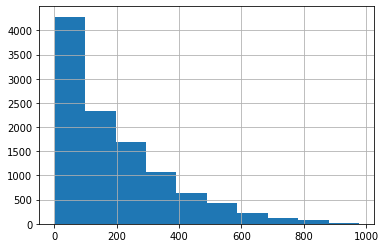

In [21]:
y_target.hist()

* y 타깃값 로그변환하기

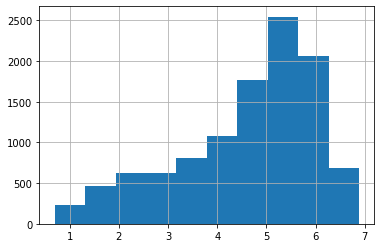

In [22]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

* 타겟 컬럼인 count 값을 log1p 로 Log 변환

In [23]:
y_target_log = np.log1p(y_target)

* 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

* 예측하기전 expm1를 이용하여 y_test와 pred를 원래 scale로 변환

In [25]:
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

* RMSLE

In [26]:
rmsle(y_test_exp,pred_exp)

1.0168265982003433

* RMSE

In [27]:
np.sqrt(mean_squared_error(y_test_exp,pred_exp))

162.5942680900463

* MAE

In [28]:
mean_absolute_error(y_test_exp,pred_exp)

109.28615860077534

* 각 특성의 가중치(lr_reg.coef_) 확인하기 (sns.barplot 이용)

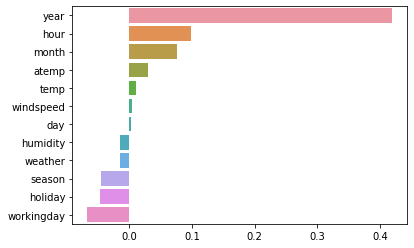

In [30]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

* 범주형 특성들 one-hot encoding ('year','month','hour','season','weather')

In [31]:
X_features_ohe = pd.get_dummies(X_features, columns=['year','month','hour', 'holiday',
                                              'workingday','season','weather'])

* 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할. 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

## 모델 선택과 훈련, 예측

* LinearRegression()

In [33]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

In [34]:
lr_y_test = np.expm1(y_test)
lr_pred = np.expm1(pred)

* RMSLE

In [35]:
rmsle(lr_y_test,lr_pred)

0.5888883046652591

* RMSE

In [36]:
np.sqrt(mean_squared_error(lr_y_test,lr_pred))

97.482084399818

* MAE

In [37]:
mean_absolute_error(lr_y_test,lr_pred)

63.1054447997536

* Ridge()

In [75]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
pred = ridge_reg.predict(X_test)

In [73]:
ridge_y_test = np.expm1(y_test)
ridge_pred = np.expm1(pred)

* RMSLE

In [74]:
rmsle(ridge_y_test,ridge_pred)

0.5888793089402273

* RMSE

In [41]:
np.sqrt(mean_squared_error(ridge_y_test,ridge_pred))

98.40685181211332

* MAE

In [42]:
mean_absolute_error(ridge_y_test,ridge_pred)

63.64829841991164

* Lasso()

In [43]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)
pred = lasso_reg.predict(X_test)

In [44]:
lasso_y_test = np.expm1(y_test)
lasso_pred = np.expm1(pred)

* RMSLE

In [45]:
rmsle(lasso_y_test,lasso_pred)

0.6343885661945593

* RMSE

In [46]:
np.sqrt(mean_squared_error(lasso_y_test,lasso_pred))

113.03085220528484

* MAE

In [47]:
mean_absolute_error(lasso_y_test,lasso_pred)

72.65823233429543

* 각 특성의 가중치(lr_reg.coef_) 확인하기 (sns.barplot 이용)

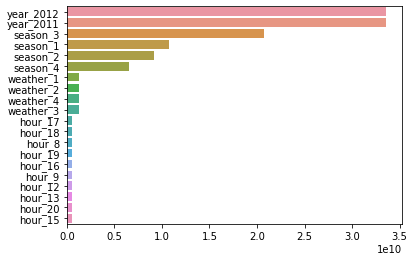

In [51]:
coef = pd.Series(lr_reg.coef_ , index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values , y=coef_sort.index)


* Ridge - GridSearchCV로 최적의 하이퍼파라미터 탐색

In [68]:
from sklearn.model_selection import GridSearchCV

params={'alpha':[0 , 0.1 , 1 , 10 , 100]}

ridge_reg = Ridge()
grid_reg = GridSearchCV(ridge_reg, param_grid= params, 
                        scoring ='neg_mean_squared_log_error', cv=5)
grid_reg.fit(X_features_ohe, y_target_log)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_log_error', verbose=0)

In [69]:
grid_reg.best_params_

{'alpha': 0.1}

In [70]:
grid_reg.best_score_

-0.021160648756080227

In [71]:
np.sqrt(-grid_reg.best_score_)

0.14546700229289194

* GridSearchCV를 통해 최적의 파라미터 탐색!

* 더 시도해볼만한 예측기가 있다면 추가!